In [1]:
#1.
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats

In [2]:
#2.
filepath_hospital = r"C:/Users/dy_dx/Documents/UM/MDST/Workshop 3/HospitalAdmissionsData.csv"
hospital = pd.read_csv(filepath_hospital)

In [3]:
#3a.
hospital.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [4]:
hospital.count()

ID                     58863
AdmissionLengthDays    58863
Death_1                58863
Admission_Type         58863
Insurance_Type         58863
EnglishLanguage_1      58863
Religion_Type          58408
Married_1              58863
Race                   58863
Dx                     58863
dtype: int64

In [17]:
hospital.head()

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


In [5]:
#3b.
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   58863 non-null  int64  
 1   AdmissionLengthDays  58863 non-null  float64
 2   Death_1              58863 non-null  int64  
 3   Admission_Type       58863 non-null  object 
 4   Insurance_Type       58863 non-null  object 
 5   EnglishLanguage_1    58863 non-null  int64  
 6   Religion_Type        58408 non-null  object 
 7   Married_1            58863 non-null  int64  
 8   Race                 58863 non-null  object 
 9   Dx                   58863 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [ ]:
#3c.

In [6]:
#3d.
hospital["Insurance_Type"].unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [7]:
#3e.
hospital["AdmissionLengthDays"].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [ ]:
#3f.

Text(0, 0.5, 'Count')

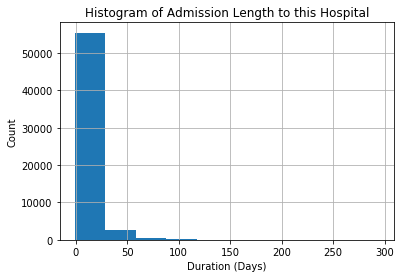

In [15]:
#3g. (1)

#Histogram of "AdmissionLengthDays"
hospital["AdmissionLengthDays"].hist()
plt.title("Histogram of Admission Length to this Hospital")
plt.xlabel("Duration (Days)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

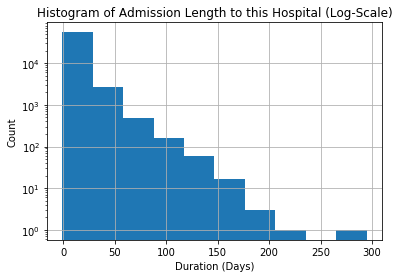

In [16]:
#3g. (2)

#Histogram of "AdmissionLengthDays", Log-Scale
hospital["AdmissionLengthDays"].hist(log = True)
plt.title("Histogram of Admission Length to this Hospital (Log-Scale)")
plt.xlabel("Duration (Days)")
plt.ylabel("Count")

Text(0, 0.5, 'Average Admission Length (Days)')

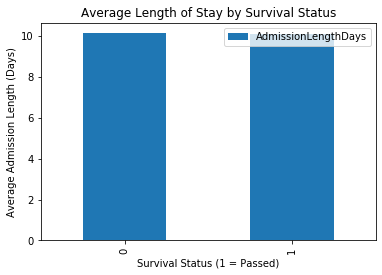

In [25]:
#3h.
survival = hospital.groupby("Death_1").mean()

survival.plot.bar(y = "AdmissionLengthDays")
plt.title("Average Length of Stay by Survival Status")
plt.xlabel("Survival Status (1 = Passed)")
plt.ylabel("Average Admission Length (Days)")

In [23]:
survival = hospital.groupby("Death_1").mean()
print(survival)

                   ID  AdmissionLengthDays  EnglishLanguage_1  Married_1
Death_1                                                                 
0        29484.310219            10.140012           0.576748   0.406765
1        29724.728811            10.129606           0.519651   0.446001


(990.8535593949656, 3.425615316200906e-213, 4, array([[ 1603.93780473,  5206.26864074, 25357.70733738, 20293.73076466,
          549.35545249],
       [  177.06219527,   574.73135926,  2799.29266262,  2240.26923534,
           60.64454751]]))


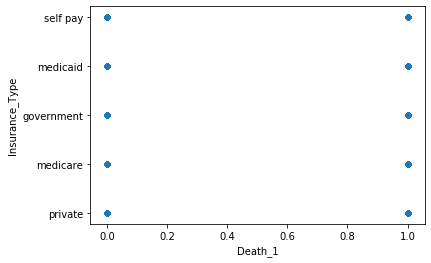

In [36]:
#3i.
hospital_death_insurance = pd.crosstab(hospital["Death_1"], hospital["Insurance_Type"])
# print(hospital_death_insurance)

chi_analysis = stats.chi2_contingency(hospital_death_insurance)
print(chi_analysis)

hospital.plot.bar()
